<a href="https://colab.research.google.com/github/csmaster23/machine_learning_principles/blob/main/chi_squared.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt
from collections import Counter

Chi-squared statistic for Gender vs Pass/Fail: 0.20
Chi-squared statistic for Study Time vs Pass/Fail: 7.70
p-value for Gender vs Pass/Fail: 0.6531
p-value for Study Time vs Pass/Fail: 0.0213


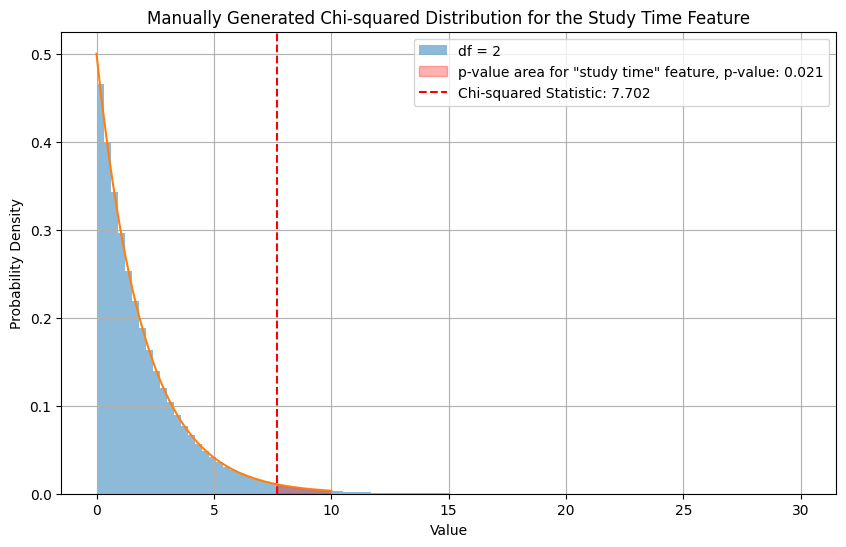

In [27]:
# Toy dataset
data = [
    {'Gender': 'Male', 'Study Time': 'High', 'Previous Test Scores': 'High', 'Pass/Fail': 'Pass'},
    {'Gender': 'Female', 'Study Time': 'Low', 'Previous Test Scores': 'Low', 'Pass/Fail': 'Fail'},
    {'Gender': 'Female', 'Study Time': 'Medium', 'Previous Test Scores': 'Medium', 'Pass/Fail': 'Pass'},
    {'Gender': 'Male', 'Study Time': 'Low', 'Previous Test Scores': 'Medium', 'Pass/Fail': 'Fail'},
    {'Gender': 'Female', 'Study Time': 'High', 'Previous Test Scores': 'Low', 'Pass/Fail': 'Pass'},
    {'Gender': 'Male', 'Study Time': 'Medium', 'Previous Test Scores': 'Medium', 'Pass/Fail': 'Pass'},
    {'Gender': 'Male', 'Study Time': 'Medium', 'Previous Test Scores': 'High', 'Pass/Fail': 'Fail'},
    {'Gender': 'Female', 'Study Time': 'Low', 'Previous Test Scores': 'Medium', 'Pass/Fail': 'Fail'},
    {'Gender': 'Male', 'Study Time': 'High', 'Previous Test Scores': 'Low', 'Pass/Fail': 'Pass'},
    {'Gender': 'Female', 'Study Time': 'Low', 'Previous Test Scores': 'Low', 'Pass/Fail': 'Fail'},
    {'Gender': 'Male', 'Study Time': 'High', 'Previous Test Scores': 'High', 'Pass/Fail': 'Pass'},
    {'Gender': 'Female', 'Study Time': 'High', 'Previous Test Scores': 'Medium', 'Pass/Fail': 'Pass'},
    {'Gender': 'Female', 'Study Time': 'Medium', 'Previous Test Scores': 'Low', 'Pass/Fail': 'Fail'},
    {'Gender': 'Male', 'Study Time': 'Low', 'Previous Test Scores': 'Low', 'Pass/Fail': 'Fail'},
    {'Gender': 'Female', 'Study Time': 'High', 'Previous Test Scores': 'Medium', 'Pass/Fail': 'Pass'},
    {'Gender': 'Male', 'Study Time': 'High', 'Previous Test Scores': 'High', 'Pass/Fail': 'Pass'},
    {'Gender': 'Female', 'Study Time': 'Medium', 'Previous Test Scores': 'High', 'Pass/Fail': 'Pass'},
    {'Gender': 'Female', 'Study Time': 'Low', 'Previous Test Scores': 'Low', 'Pass/Fail': 'Fail'},
    {'Gender': 'Male', 'Study Time': 'Low', 'Previous Test Scores': 'Low', 'Pass/Fail': 'Fail'},
    {'Gender': 'Male', 'Study Time': 'High', 'Previous Test Scores': 'High', 'Pass/Fail': 'Pass'}
]

# Step 1: Count the occurrences for Gender vs Pass/Fail
def count_occurrences(data, feature, target):
    """ Count occurrences of feature values against target values """
    feature_target_count = Counter((row[feature], row[target]) for row in data)
    feature_count = Counter(row[feature] for row in data)
    target_count = Counter(row[target] for row in data)

    return feature_target_count, feature_count, target_count

# Chi-squared test calculation
def chi_squared_test(feature_target_count, feature_count, target_count, total_samples):
    """ Compute the chi-squared statistic manually """
    chi2_stat = 0
    for (feature_val, target_val), observed in feature_target_count.items():
        expected = (feature_count[feature_val] * target_count[target_val]) / total_samples
        chi2_stat += (observed - expected) ** 2 / expected
    return chi2_stat

# Data summary
total_samples = len(data)

# Step 2: Chi-squared test for Gender vs Pass/Fail
gender_target_count, gender_count, pass_fail_count = count_occurrences(data, 'Gender', 'Pass/Fail')
chi2_gender = chi_squared_test(gender_target_count, gender_count, pass_fail_count, total_samples)

# Step 3: Chi-squared test for Study Time vs Pass/Fail
study_time_target_count, study_time_count, _ = count_occurrences(data, 'Study Time', 'Pass/Fail')
chi2_study_time = chi_squared_test(study_time_target_count, study_time_count, pass_fail_count, total_samples)

# Step 4: Output the chi-squared results
print(f"Chi-squared statistic for Gender vs Pass/Fail: {chi2_gender:.2f}")
print(f"Chi-squared statistic for Study Time vs Pass/Fail: {chi2_study_time:.2f}")

df_gender = 1
df_study_time = 2
# Step 5: Calculate p-values using the chi2 survival function (sf)
p_value_gender = chi2.sf(chi2_gender, df_gender)
p_value_study_time = chi2.sf(chi2_study_time, df_study_time)

# Step 6: Output the p value results
print(f"p-value for Gender vs Pass/Fail: {p_value_gender:.4f}")
print(f"p-value for Study Time vs Pass/Fail: {p_value_study_time:.4f}")

# Plot the study time chi-squared value with its degree of freedom distribution
# Generate a large number of samples to approximate the chi-squared distribution
n_samples = 1000000
x = np.linspace(0, 10, 10000)
y = chi2.pdf(x, df_study_time)

plt.figure(figsize=(10, 6))
# Manually generate chi-squared samples by summing squared normal variables
chi_squared_samples = np.sum(np.random.randn(n_samples, df_study_time)**2, axis=1)
# Create a histogram to approximate the probability density function
plt.hist(chi_squared_samples, bins=100, density=True, alpha=0.5, label=f'df = {df_study_time}')
plt.plot(x, y) # chi-squared distribution smooth line
plt.fill_between(x, y, where=(x >= chi2_study_time), color='red', alpha=0.3, label=f'p-value area for "study time" feature, p-value: {round(p_value_study_time, 3)}')
plt.title('Manually Generated Chi-squared Distribution for the Study Time Feature')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.axvline(x=chi2_study_time, color='red', linestyle='--', label=f'Chi-squared Statistic: {round(chi2_study_time,3)}')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


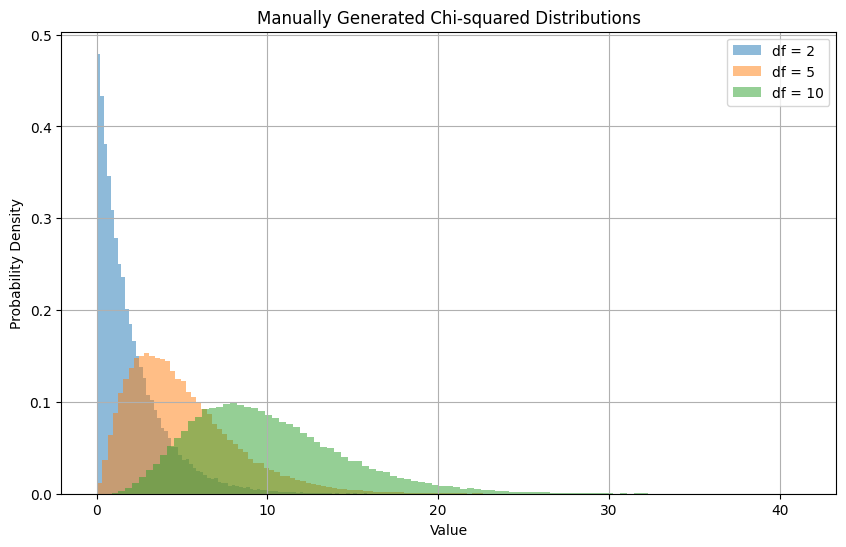

In [22]:
# Define the degrees of freedom
dfs = [2, 5, 10]

# Generate a large number of samples to approximate the chi-squared distribution
n_samples = 100000

# Create a range of x values for plotting
x = np.linspace(0, 30, 1000)

# Initialize a figure for plotting
plt.figure(figsize=(10, 6))

# Loop through different degrees of freedom
for df in dfs:
    # Manually generate chi-squared samples by summing squared normal variables
    chi_squared_samples = np.sum(np.random.randn(n_samples, df)**2, axis=1)

    # Create a histogram to approximate the probability density function
    plt.hist(chi_squared_samples, bins=100, density=True, alpha=0.5, label=f'df = {df}')

# Add labels and title for clarity
plt.title('Manually Generated Chi-squared Distributions')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()
